In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import LabelEncoder

In [2]:
# load data
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')


In [3]:
df_train.columns

Index(['Danceability', 'Energy', 'Key', 'Loudness', 'Speechiness',
       'Acousticness', 'Instrumentalness', 'Liveness', 'Valence', 'Tempo',
       'Duration_ms', 'Views', 'Likes', 'Stream', 'Album_type', 'Licensed',
       'official_video', 'id', 'Track', 'Album', 'Uri', 'Url_spotify',
       'Url_youtube', 'Comments', 'Description', 'Title', 'Channel',
       'Composer', 'Artist'],
      dtype='object')

In [4]:
df_train.dtypes

Danceability        float64
Energy              float64
Key                 float64
Loudness            float64
Speechiness         float64
Acousticness        float64
Instrumentalness    float64
Liveness            float64
Valence             float64
Tempo               float64
Duration_ms         float64
Views               float64
Likes               float64
Stream              float64
Album_type           object
Licensed             object
official_video       object
id                    int64
Track                object
Album                object
Uri                  object
Url_spotify          object
Url_youtube          object
Comments            float64
Description          object
Title                object
Channel              object
Composer             object
Artist               object
dtype: object

In [5]:
def create_dictionary(keys):
    dictionary = {}
    for key in keys:
        dictionary[key] = None  
    return dictionary


def data_process_keep_only_numerical(input_data):
    numeric_columns = input_data.select_dtypes(include=['int64', 'float64'])
    return numeric_columns

def word_dictionary(arr_columns, input_train, input_test):
    # Append the two DataFrames
    appended_df = pd.concat([input_train, input_test])
    appended_df.reset_index(drop=True, inplace=True)
    arr_word_dict = {}
    for col in arr_columns:
        uniq_tmp = appended_df[col].unique()
        arr_dict = {value: value if isinstance(value, (int, float)) and np.isnan(value) else index for index, value in enumerate(uniq_tmp)}
        arr_word_dict[col] = arr_dict
    return arr_word_dict

word_dict = word_dictionary([
    'Album_type', 'Licensed', 'official_video', 'Track', 'Album', 'Uri', 'Url_spotify', 'Url_youtube', 
    'Description', 'Title', 'Channel', 'Composer', 'Artist'], df_train, df_test)

# Using Dictionary:
#   Album_type, Licensed, official_video, Composer, Channel, Artist
# Can be removed:
#   Uri, Url_spotify, Url_youtube
# Cannot use word_dict:
#   Track, Album, Description, Title
# ret_train.head()
# ret_test.head()

In [6]:
word_dict['Album_type']

{'album': 0, nan: nan, 'single': 2, 'compilation': 3}

In [7]:
df_train.head(4)

,Danceability,Energy,Key,Loudness,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,...,Album,Uri,Url_spotify,Url_youtube,Comments,Description,Title,Channel,Composer,Artist
0,0.0,0.000273,3.0,-25.176,0.0443,0.724151,0.000062,0.000807,0.340,83.398,...,Sinkovsky Plays and Sings Vivaldi,spotify:track:7njAZhca4o80qQdCgyEWya,https://open.spotify.com/artist/2QOIawHpSlOwXD...,https://www.youtube.com/watch?v=NzCL9uLkQSI,3070.0,Antonio Vivaldi's 4th Concerto - From his Most...,"Antonio Vivaldi - Concerto No.4 in F minor, Op...",Mozafunkula,NaN,Marshmello
1,0.0,0.184220,7.0,NaN,NaN,0.672221,0.910000,0.034966,0.746,148.692,...,NaN,spotify:track:2nnXe7n3Vivs7OfQKRsfWD,https://open.spotify.com/artist/2QOIawHpSlOwXD...,https://www.youtube.com/watch?v=jAnzlpPuIDU,122.0,"A. Vivaldi Concerto No. 2 in G minor, RV 315, ...","A. Vivaldi Concerto No. 2 in G minor, RV 315, ...",Anton Paisov,Finneas O'Connell,Bon Iver
2,0.0,NaN,6.0,-15.596,NaN,0.667628,0.867000,0.001772,0.380,84.899,...,Vivaldi: The Four Seasons,spotify:track:0VQMAup2VdeQWLCvM14Uz2,https://open.spotify.com/artist/2QOIawHpSlOwXD...,https://www.youtube.com/watch?v=jAnzlpPuIDU,122.0,"A. Vivaldi Concerto No. 2 in G minor, RV 315, ...",NaN,Anton Paisov,Finneas O'Connell,Kamasi Washington
3,1.0,0.209585,NaN,-6.251,0.0277,0.003796,NaN,0.001000,NaN,150.220,...,Life Thru A Lens,spotify:track:1M2nd8jNUkkwrc1dgBPTJz,https://open.spotify.com/artist/2HcwFjNelS49kF...,https://www.youtube.com/watch?v=luwAMFcc2f8,24350.0,25 years of Life Thru A Lens. Pre-order the br...,Robbie Williams - Angels,robbiewilliamsvevo,Louis Bell,Drake


In [8]:
def data_convert(df, word_dict):
    df_ret = df.copy()
    for dic in word_dict:
        print(dic)
        for key_dic in word_dict[dic]:
            df_ret.loc[df_ret[dic] == key_dic, dic] = word_dict[dic][key_dic]
    return df_ret     

In [9]:
df_train_embedding = data_convert(df_train, word_dict)

Album_type
Licensed
official_video
Track
Album
Uri
Url_spotify
Url_youtube
Description
Title
Channel
Composer
Artist


In [10]:
df_test_embedding = data_convert(df_test, word_dict)

Album_type
Licensed
official_video
Track
Album
Uri
Url_spotify
Url_youtube
Description
Title
Channel
Composer
Artist


In [12]:
obj_columns = df_train_embedding.select_dtypes(include=['object']).columns
# print(int_columns)
# convert integer columns to float
df_train_embedding[obj_columns] = df_train_embedding[obj_columns].astype(np.float)

/tmp/ipykernel_54/2578188673.py:4: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  df_train_embedding[obj_columns] = df_train_embedding[obj_columns].astype(np.float)


In [16]:
def corr_matrix_with_threshold(df, threshold, title_str = "Filtered Correlation Matrix (Half Square)"):
    # Add target column to the DataFrame
    corr_matrix = df.corr()
    # Filter the correlation matrix based on the threshold
    filtered_matrix = corr_matrix[corr_matrix.abs() > threshold]
    mask = np.triu(np.ones_like(filtered_matrix, dtype=bool))
    
    plt.figure(figsize=(8, 6))
    sns.heatmap(filtered_matrix, annot=True, fmt=".2f", mask=mask, cmap="coolwarm")
    plt.title(title_str)
    plt.show()


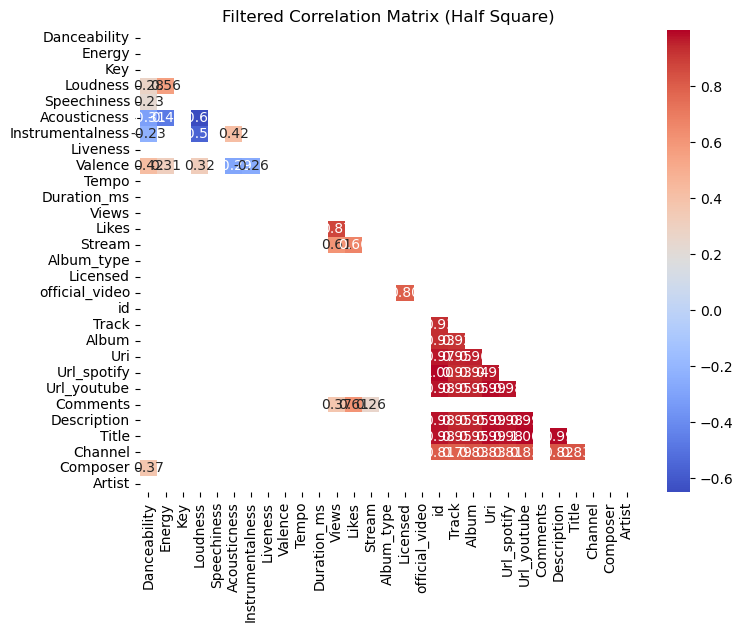

In [17]:
corr_matrix_with_threshold(df_train_embedding, 0.2)

In [18]:
def remove_unimportant_column(df, arr_column):
    df_dropped = df.drop(arr_column, axis=1)
    return df_dropped

In [19]:
arr_NOT_important_column = ['Uri', 'Url_spotify', 'Url_youtube', 'Description', 'id', 'Licensed', 'official_video', 'Title', 'Album']
df_train_embedding_important = remove_unimportant_column(df_train_embedding, arr_NOT_important_column)
df_test_embedding_important = remove_unimportant_column(df_test_embedding, arr_NOT_important_column)

In [23]:
df_train_embedding_important

,Danceability,Energy,Key,Loudness,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Duration_ms,Views,Likes,Stream,Album_type,Track,Comments,Channel,Composer,Artist
0,0.0,0.000273,3.0,-25.176,0.0443,7.241508e-01,0.000062,0.000807,0.3400,83.398,117907.0,NaN,137622.0,19981370.0,0.0,NaN,3070.0,0.0,NaN,0.0
1,0.0,0.184220,7.0,NaN,NaN,6.722214e-01,0.910000,0.034966,0.7460,148.692,173427.0,184825.0,5190.0,NaN,NaN,1.0,122.0,1.0,1.0,1.0
2,0.0,NaN,6.0,-15.596,NaN,6.676276e-01,0.867000,0.001772,0.3800,84.899,150667.0,184825.0,5190.0,19320810.0,NaN,2.0,122.0,1.0,1.0,2.0
3,1.0,0.209585,NaN,-6.251,0.0277,3.796416e-03,NaN,0.001000,NaN,150.220,265000.0,202457327.0,997035.0,399661898.0,0.0,3.0,24350.0,2.0,2.0,3.0
4,4.0,NaN,5.0,NaN,0.0260,3.048625e-06,0.000467,0.002924,0.2950,97.997,263867.0,316688049.0,1299086.0,NaN,0.0,4.0,31150.0,2.0,3.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17165,3.0,0.794023,5.0,-6.344,0.0328,8.991539e-02,0.000000,0.000591,0.6580,90.002,94667.0,NaN,1113.0,NaN,NaN,12972.0,0.0,5190.0,1.0,50.0
17166,2.0,0.820026,4.0,-1.786,NaN,2.195200e-05,0.000000,0.000786,0.6570,174.869,150857.0,164741.0,2019.0,10898176.0,2.0,12973.0,0.0,5190.0,3.0,36.0
17167,1.0,0.571787,4.0,-4.679,0.0647,NaN,0.000000,0.003652,0.4190,168.388,136842.0,35646.0,329.0,NaN,2.0,12974.0,0.0,NaN,4.0,NaN
17168,1.0,0.451218,9.0,NaN,0.4190,4.511802e-02,NaN,0.001260,0.5390,155.378,108387.0,6533.0,NaN,6873961.0,2.0,12975.0,0.0,5190.0,1.0,70.0


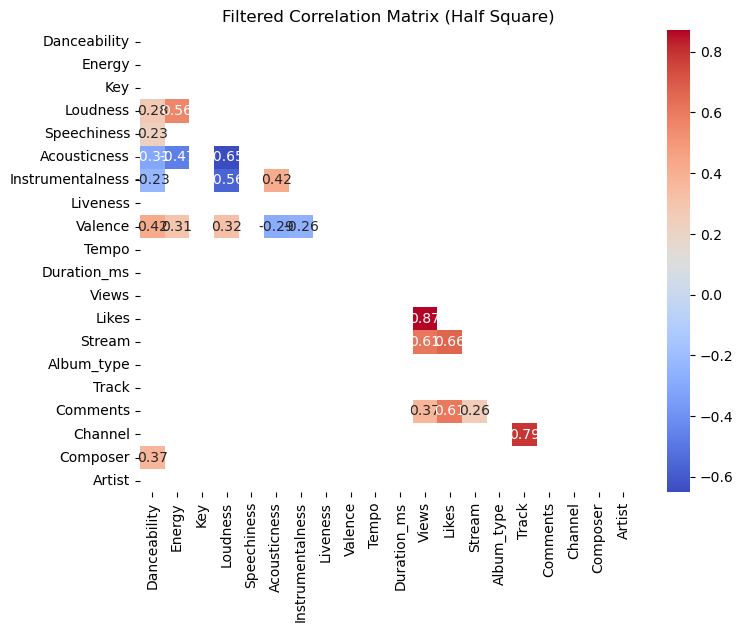

In [24]:
corr_matrix_with_threshold(df_train_embedding_important, 0.2)

* Danceability ==> Valence: 0.424102 | Composer: 0.295219| Loudness: 0.275222 | Speechiness:0.228473|  Acousticness:-0.309605| Instrumentalness: -0.231177 | Likes: 0.103480| 
* Valence      ==> Loudness: 0.319542  |  Energy: 0.305514  |  Acousticness: -0.288254  | Instrumentalness: -0.258984  | Composer: 0.143226
* Composer     ==> Valence: 0.143226 | 
* Loudness     ==> Energy: 0.559834 | Valence: 0.319542 |Tempo: 0.146088	| Acousticness: -0.651000 |Instrumentalness: -0.563593 |  Views: 0.110302 | Likes: 0.123328 | Stream: 0.112378
* Speechiness  ==> Acousticness: -0.141015 |Instrumentalness: -0.113436
* Acousticness ==> Energy: -0.471571 | Loudness: -0.651000 |Instrumentalness: 0.416931| Energy: -0.471571 | Tempo: -0.127284
* Instrumentalness ==> Energy: -0.135264 | Loudness: -0.563593| Acousticness: 0.416931| Valence: -0.258984
* Likes ==> Views: 0.871248 |Stream: 0.664720 |Comments: 0.609587| Loudness:0.123328

In [25]:
arr_NOT_important_column = [ 'Views','Composer', 'Likes', 'Stream', 'Track', 'Key', 'Liveness', 'Duration_ms',  'Album_type', 'Comments','Channel','Artist'  ]
df_train_embedding_important_simple = remove_unimportant_column(df_train_embedding_important, arr_NOT_important_column)
df_test_embedding_important_simple = remove_unimportant_column(df_test_embedding_important, arr_NOT_important_column)

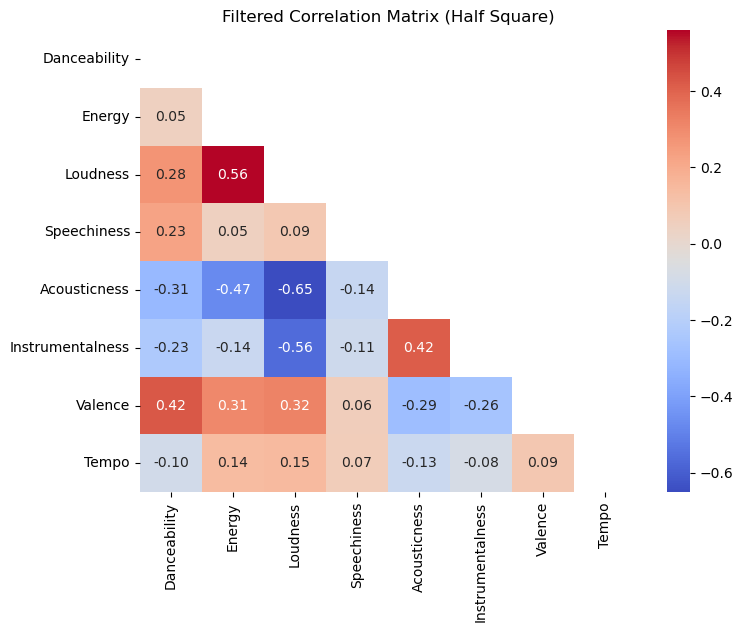

In [26]:
corr_matrix_with_threshold(df_train_embedding_important_simple, 0.01)

In [71]:
# we got around 5500 clean data without N/A
# it means that it got around 12000 non-clean data

df_with_clean_data = df_train_embedding_important_simple.dropna()
print("Clean Data without NaN:", len(df_with_clean_data))
print("Data with NaN:", len(df_train_embedding_important_simple) - len(df_with_clean_data))

# Make the clean data to give strength to the dataset
# duplicate 2x to the data training
# so it should dominate the dataset

df_train_embedding_important_simple_added = pd.concat([
    df_train_embedding_important_simple, 
    df_with_clean_data
]).sample(frac=1).reset_index(drop=True)

print("After merging Clean data with distorted data:", len(df_train_embedding_important_simple_added))

Clean Data without NaN: 5544
Data with NaN: 11626
After merging Clean data with distorted data: 22714


In [72]:
def imputer(df):
    df_ret = df.copy()
    mean_values =  df['Valence'].mean()
    df_ret['Valence'] = df['Valence'].fillna(mean_values)

    mean_values = df['Loudness'].mean()
    df_ret['Loudness'] = df['Loudness'].fillna(mean_values)
    
    mean_values = df['Speechiness'].mean()
    df_ret['Speechiness'] = df['Speechiness'].fillna(mean_values)
    
    mean_values = df['Acousticness'].mean()
    df_ret['Acousticness'] = df['Acousticness'].fillna(mean_values) #0.000000000001)
    
    mean_values = df['Instrumentalness'].mean()
    df_ret['Instrumentalness'] = df['Instrumentalness'].fillna(mean_values)

    mean_values = df['Energy'].mean()
    df_ret['Energy'] = df['Energy'].fillna(mean_values)

    mean_values = df['Tempo'].mean()
    df_ret['Tempo'] = df['Tempo'].fillna(mean_values)
    
    return df_ret


df_train_embedding_important_simple_imputer = imputer(df_train_embedding_important_simple_added)    
df_test_embedding_important_simple_imputer = imputer(df_test_embedding_important_simple)    


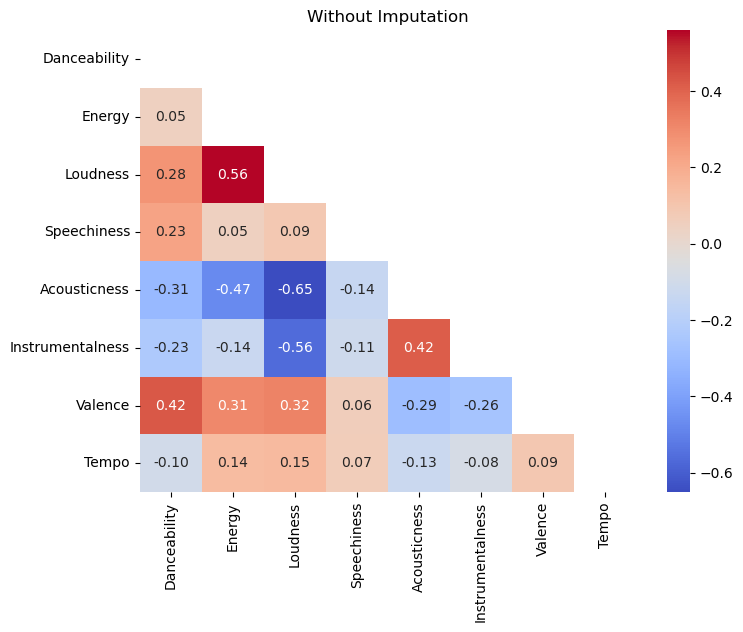

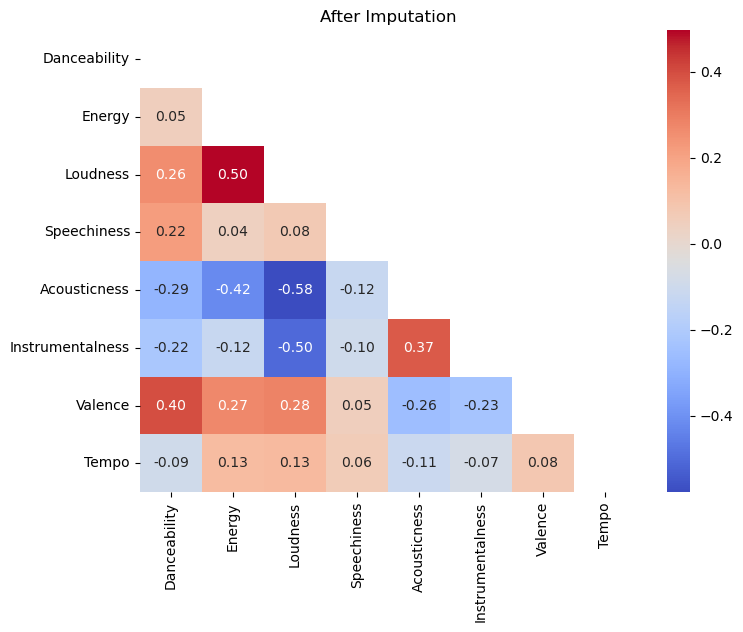

In [73]:
corr_matrix_with_threshold(df_train_embedding_important_simple, 0.01, 'Without Imputation')
corr_matrix_with_threshold(df_train_embedding_important_simple_imputer, 0.01, 'After Imputation')

In [74]:
from sklearn.model_selection import train_test_split
train_features, val_features, train_labels, val_labels = train_test_split(df_train_embedding_important_simple_imputer.iloc[:, 1:], df_train_embedding_important_simple_imputer.iloc[:, :1], test_size = 0.20, random_state = 42)

In [76]:
train_features

,Energy,Loudness,Speechiness,Acousticness,Instrumentalness,Valence,Tempo
1358,0.108531,-7.553611,0.2080,0.000462,0.054690,0.384000,78.896000
5377,0.030959,-8.091000,0.2440,0.001331,0.000000,0.296000,110.898000
12012,0.146363,-6.748000,0.1100,0.012487,0.000402,0.192000,88.958000
2448,0.584277,-7.138000,0.1070,0.105154,0.000025,0.217000,124.984000
841,0.205379,-5.204000,0.0367,0.000703,0.000173,0.653000,136.232000
...,...,...,...,...,...,...,...
11964,0.467289,-3.868000,0.0600,0.082882,0.000006,0.925000,103.567000
21575,0.247673,-4.435000,0.0717,0.067917,0.000000,0.297000,111.173000
5390,0.304821,-4.842000,0.0377,0.114106,0.054690,0.525196,120.939016
860,0.107850,-10.993000,0.0416,0.000013,0.141000,0.525196,120.939016


In [77]:
train_labels

,Danceability
1358,6.0
5377,5.0
12012,6.0
2448,3.0
841,6.0
...,...
11964,6.0
21575,3.0
5390,8.0
860,4.0


In [78]:
val_features

,Energy,Loudness,Speechiness,Acousticness,Instrumentalness,Valence,Tempo
14159,0.350403,-4.041,0.060600,0.016003,0.000002,0.571000,95.023000
8900,0.467289,-9.937,0.095076,0.004252,0.000038,0.568000,85.992000
10359,0.257259,-7.431,0.077100,0.019249,0.054690,0.438000,127.021000
10022,0.217082,-5.616,0.148000,0.000142,0.000000,0.457000,120.939016
18511,0.265848,-8.392,0.095076,0.008121,0.000306,0.592000,152.980000
...,...,...,...,...,...,...,...
5597,0.192100,-5.436,0.049100,0.354895,0.004280,0.525196,104.927000
387,0.335103,-7.828,0.077800,0.001772,0.001310,0.623000,96.001000
19387,0.283593,-3.061,0.095076,0.005000,0.000000,0.437000,107.010000
18779,0.676836,-3.639,0.048400,0.000003,0.054690,0.481000,120.939016


In [79]:
val_labels

,Danceability
14159,8.0
8900,1.0
10359,5.0
10022,4.0
18511,3.0
...,...
5597,6.0
387,6.0
19387,7.0
18779,5.0


# All Data

# Try Sofi's Ensemble

In [80]:
class LGBWrapper:
    def __init__(self, params=None, num_boost_round=10):
        self.params = params
        self.num_boost_round = num_boost_round
        self.model = None

    def fit(self, X, y):
        lgb_train = lgb.Dataset(X, y, free_raw_data=False)
        self.model = lgb.train(self.params, lgb_train, num_boost_round=self.num_boost_round)

    def predict(self, X):
        return self.model.predict(X)


In [81]:
# Prepare LightGBM parameters
params = {
    'boosting_type': 'gbdt',
    'objective': 'regression',
    'metric': 'mae',
    'learning_rate': 0.05,
    'num_leaves': 31,
    'verbose': -1
}

# For XGBRegressor parameters
default_params = {
    'objective': 'reg:squarederror',
    'booster': 'gbtree',
    'n_estimators': 100,
    'learning_rate': 0.1,
    'max_depth': 3,
    'min_child_weight': 1,
    'subsample': 1,
    'colsample_bytree': 1,
    'gamma': 0,
    'reg_alpha': 0,
    'reg_lambda': 1,
    'random_state': 0,
    'n_jobs': -1
}


In [89]:
from sklearn.ensemble import VotingRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import AdaBoostClassifier
from sklearn.multiclass import OneVsOneClassifier
import lightgbm as lgb
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler

import pickle
scaler = MinMaxScaler(feature_range=(0, 9))
# Instantiate the classfiers and make a list
regressors = [
    LGBWrapper(params, num_boost_round=200),
    RandomForestRegressor(n_estimators=1000, random_state=42),
    RandomForestRegressor(n_estimators=2000, random_state=42),
    XGBRegressor(**default_params),
    OneVsOneClassifier(AdaBoostClassifier(n_estimators=45, random_state=42)),
]
# Define a result table as a DataFrame
result_table = pd.DataFrame(columns=['regressors', 'mae', 'accuracy'])

# Train and evaluate each classifier
for reg in regressors:
    print("Processing Regressor:", reg.__class__.__name__)
    reg.fit(train_features, np.ravel(train_labels))
    pred = reg.predict(val_features)
    accuracy = accuracy_score(np.ravel(val_labels), np.rint(pred))
    mae = mean_absolute_error(np.ravel(val_labels), np.rint(pred))
    pd_tmp = pd.DataFrame({'regressors':[reg.__class__.__name__], 'mae': [mae], 'accuracy': [accuracy]})
    result_table = pd.concat([result_table, pd_tmp])

result_table.set_index('regressors', inplace=True)
result_table.sort_values(by=['mae'], ascending=True)




Processing Regressor: LGBWrapper
Processing Regressor: RandomForestRegressor
Processing Regressor: RandomForestRegressor
Processing Regressor: XGBRegressor
Processing Regressor: OneVsOneClassifier


,mae,accuracy
regressors,,
RandomForestRegressor,1.277130,0.309487
RandomForestRegressor,1.277790,0.307506
LGBWrapper,1.593881,0.183799
XGBRegressor,1.725292,0.168391
OneVsOneClassifier,1.950253,0.260621


In [90]:
result_table


,mae,accuracy
regressors,,
LGBWrapper,1.593881,0.183799
RandomForestRegressor,1.277790,0.307506
RandomForestRegressor,1.277130,0.309487
XGBRegressor,1.725292,0.168391
OneVsOneClassifier,1.950253,0.260621


In [93]:
# train on the full training set
for reg in regressors:
    print("Processing Regressor:", reg.__class__.__name__)
    reg.fit(
        df_train_embedding_important_simple_imputer.iloc[:, 1:],                # Full X data
        np.ravel(df_train_embedding_important_simple_imputer.iloc[:, :1])       # Full Y label
    )

Processing Regressor: LGBWrapper
Processing Regressor: RandomForestRegressor
Processing Regressor: RandomForestRegressor
Processing Regressor: XGBRegressor
Processing Regressor: OneVsOneClassifier


In [94]:
def ensemble_predict(regressors, X):
    # Initialize an empty array of predictions
    predictions = np.zeros((X.shape[0], len(regressors)))

    # Generate predictions for each regressor
    for i, reg in enumerate(regressors):
        predictions[:, i] = reg.predict(X)

    # Average the predictions
    avg_predictions = predictions.mean(axis=1)

    return avg_predictions, predictions

# Make ensemble predictions
ensemble_predictions_l1, all_predictions = ensemble_predict(regressors, df_test_embedding_important_simple_imputer)


In [97]:
import datetime

current_datetime = datetime.datetime.now()
datetime_string = current_datetime.strftime("%Y%m%d_%H%M")

predictionsTest = ensemble_predictions_l1
preds = np.rint(predictionsTest)
preds = preds.astype(int)
preds = pd.DataFrame(preds, columns=['Danceability'])
preds['id'] = preds.index + 17170
preds = preds[['id', 'Danceability']]
preds.to_csv('L1_cascade_' + datetime_string + '.csv', index=False)

In [104]:
np.rint(predictionsTest)

array([7., 5., 6., ..., 2., 5., 7.])

In [117]:
df_hasil = pd.DataFrame()
tmp = pd.read_csv('old0.csv')
tmp = tmp.drop('id', axis=1)

In [119]:
df_hasil = pd.concat([df_hasil, tmp], axis=1)

for t in range(1,8):
    tmp = pd.read_csv('old'+ str(t) +'.csv')
    tmp = tmp.drop('id', axis=1)
    df_hasil = pd.concat([df_hasil, tmp], axis=1)

# print(df_hasil)
label_test = df_hasil.mean(axis=1)

tmp_danceability = pd.DataFrame(np.rint(label_test), columns=['Danceability'])
concat_cheat = pd.concat([tmp_danceability, df_test_embedding_important_simple_imputer ], axis=1)

accuracy = accuracy_score(np.rint(tmp), np.rint(predictionsTest))
mae = mean_absolute_error(np.rint(tmp), np.rint(predictionsTest))

print("Cheat Kaggle MAE", mae, "Accuracy", accuracy)

Cheat Kaggle MAE 0.9116389548693586 Accuracy 0.348535233570863


In [125]:
pd_new_generated = pd.concat([df_train_embedding_important_simple_imputer, concat_cheat])
pd_new_generated = pd_new_generated.reset_index(drop=True)
pd_new_generated

,Danceability,Energy,Loudness,Speechiness,Acousticness,Instrumentalness,Valence,Tempo
0,4.0,0.246492,-9.733000,0.045400,0.308916,0.000000,0.597000,92.932000
1,9.0,0.555412,-4.684000,0.146000,0.114106,0.000000,0.831000,130.949000
2,5.0,0.138992,-7.626000,0.029500,0.594823,0.054690,0.639000,124.014000
3,1.0,0.257259,-7.553611,0.032900,0.168197,0.000000,0.612000,110.733000
4,3.0,0.000175,-16.409000,0.053600,0.973242,0.054690,0.214000,138.327000
...,...,...,...,...,...,...,...,...
29024,1.0,0.160377,-6.366894,0.045451,0.317692,0.006016,0.160253,72.136829
29025,7.0,0.318585,-4.148566,0.073000,0.007420,0.000817,0.614366,114.903993
29026,3.0,0.426223,-5.807545,0.072906,0.661708,0.898308,0.087281,87.969239
29027,5.0,0.204440,-11.563964,0.037676,0.003631,0.491785,0.482987,114.903993


In [127]:
# Train using Full Training dataset + slight-cheating majority from previous submission
result_table = pd.DataFrame(columns=['regressors', 'mae', 'accuracy'])

# Train and evaluate each classifier
for reg in regressors:
    print("Processing Regressor:", reg.__class__.__name__)
    reg.fit(pd_new_generated.iloc[:, 1:], np.ravel(pd_new_generated.iloc[:, :1]))    
    pred = reg.predict(val_features)
    accuracy = accuracy_score(np.ravel(val_labels), np.rint(pred))
    mae = mean_absolute_error(np.ravel(val_labels), np.rint(pred))
    pd_tmp = pd.DataFrame({'regressors':[reg.__class__.__name__], 'mae': [mae], 'accuracy': [accuracy]})
    result_table = pd.concat([result_table, pd_tmp])

result_table.set_index('regressors', inplace=True)
result_table.sort_values(by=['mae'], ascending=True)


Processing Regressor: LGBWrapper
Processing Regressor: RandomForestRegressor
Processing Regressor: RandomForestRegressor
Processing Regressor: XGBRegressor
Processing Regressor: OneVsOneClassifier


,mae,accuracy
regressors,,
RandomForestRegressor,0.354611,0.680608
RandomForestRegressor,0.356372,0.678847
LGBWrapper,1.526524,0.192384
XGBRegressor,1.711424,0.166850
OneVsOneClassifier,1.824345,0.272507


In [ ]:
# # train on the full training set
# result_table = pd.DataFrame(columns=['regressors', 'mae'])

# for reg in regressors:
#     reg.fit(pd_new_generated.iloc[:, 1:], pd_new_generated.iloc[:, :1])
#     pred = reg.predict(val_features)
#     accuracy = accuracy_score(val_labels, np.rint(pred))
#     mae = mean_absolute_error(val_labels, pred)
#     result_table = result_table.append({'regressors':reg.__class__.__name__, 'mae': mae, 'accuracy': accuracy}, ignore_index=True)

# result_table.set_index('regressors', inplace=True)
# result_table.sort_values(by=['mae'], ascending=True)
# result_table    
    

In [128]:
# Make ensemble predictions
ensemble_predictions_l2, all_predictions = ensemble_predict(regressors, df_test_embedding_important_simple_imputer)


In [ ]:
current_datetime = datetime.datetime.now()
datetime_string = current_datetime.strftime("%Y%m%d_%H%M")

predictionsTest = ensemble_predictions_l2
preds = np.rint(predictionsTest)
preds = preds.astype(int)
preds = pd.DataFrame(preds, columns=['Danceability'])
preds['id'] = preds.index + 17170
preds = preds[['id', 'Danceability']]
preds.to_csv('L2_cascade_' + datetime_string + '.csv', index=False)